<a href="https://colab.research.google.com/github/Jectrianama/GCCE_TEST/blob/main/GCECDL1/New_thyroid_gcce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!git clone https://github.com/Jectrianama/GCCE_TEST.git

fatal: destination path 'GCCE_TEST' already exists and is not an empty directory.


# Subclassing for GCCE

In [15]:
 
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import mode 
import numpy as np

def ook(t):
  lb = LabelBinarizer()
  y_ook = lb.fit_transform(t)  

  if len(np.unique(t))==2:
    y_ook = np.concatenate((1-y_ook.astype(bool), y_ook), axis = 1) 

  return y_ook

In [16]:
#cargar datos desde drive otros dataset
FILEID = "1AU8pTtCLihBjCZjWITaAzpnEuL4RO436"
#https://drive.google.com/file/d/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  DataGCCE.zip && rm -rf /tmp/cookies.txt
!unzip -o DataGCCE.zip
!dir

--2023-02-11 05:03:51--  https://docs.google.com/uc?export=download&confirm=&id=1AU8pTtCLihBjCZjWITaAzpnEuL4RO436
Resolving docs.google.com (docs.google.com)... 142.251.2.100, 142.251.2.101, 142.251.2.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/519pusd9sk9bh8oruc6982s0igbkujd1/1676091825000/07591141114418430227/*/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436?e=download&uuid=58a38439-331d-41d5-877b-69665c76b08f [following]
--2023-02-11 05:03:55--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/519pusd9sk9bh8oruc6982s0igbkujd1/1676091825000/07591141114418430227/*/1AU8pTtCLihBjCZjWITaAzpnEuL4RO436?e=download&uuid=58a38439-331d-41d5-877b-69665c76b08f
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 142.251.2.132, 2607:f

In [17]:
#cargar datos desde drive acceso libre
FILEID = "1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW"
#https://drive.google.com/file/d/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MADatasets.zip && rm -rf /tmp/cookies.txt
!unzip -o MADatasets.zip
!dir

--2023-02-11 05:03:56--  https://docs.google.com/uc?export=download&confirm=t&id=1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW
Resolving docs.google.com (docs.google.com)... 142.251.2.100, 142.251.2.101, 142.251.2.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9op6gehl2lisu6gtp4it1bqktrul5qs0/1676091825000/07591141114418430227/*/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW?e=download&uuid=6af988ba-7240-4ff3-b292-59879f91bb90 [following]
--2023-02-11 05:03:56--  https://doc-00-90-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9op6gehl2lisu6gtp4it1bqktrul5qs0/1676091825000/07591141114418430227/*/1SQnWXGROG2Xexs5vn3twuv7SqiWG5njW?e=download&uuid=6af988ba-7240-4ff3-b292-59879f91bb90
Resolving doc-00-90-docs.googleusercontent.com (doc-00-90-docs.googleusercontent.com)... 142.251.2.132, 2607:

In [18]:
import os
os.chdir('/content/GCCE_TEST/Models')
from  keras_ma_gcce import *
from labels_generation import MA_Clas_Gen



# Load Data

In [19]:
#load data
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf #importar tensorflow
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import numpy as np
database = 'thyroid' #['bupa1', 'breast-cancer-wisconsin1','pima-indians-diabetes1', 'ionosphere1', 'tic-tac-toe1', 'iris1', 'wine1', 'segmentation1']



import pandas as pd
from sklearn.preprocessing import LabelEncoder
os.chdir('../../')
df = pd.read_csv(r'/content/new-thyroid.csv') 
df.head()

#Dividing X and y
t = np.array(LabelEncoder().fit_transform(df['class'].tolist()))
X = np.array(df.drop(['class'], axis = 1).values)
print('X',X.shape,'t',t.shape)
t =t+1

X (215, 5) t (215,)


# Labels Generation  

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


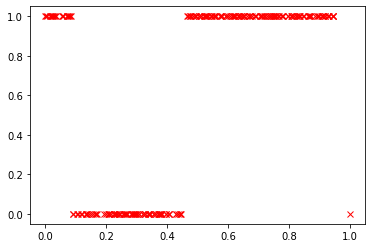

In [20]:
Y, iAnn, Lam_r = MA_Clas_Gen(X ,t, R=5, NrP=1)

In [21]:

Y = Y - 1
t = t - 1
#YMA = YMA-1


annotator 1
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       150
           1       0.65      0.91      0.76        35
           2       0.69      0.97      0.81        30

    accuracy                           0.85       215
   macro avg       0.78      0.90      0.82       215
weighted avg       0.89      0.85      0.86       215

annotator 2
              precision    recall  f1-score   support

           0       0.87      0.65      0.75       150
           1       0.17      0.17      0.17        35
           2       0.42      0.93      0.58        30

    accuracy                           0.61       215
   macro avg       0.49      0.59      0.50       215
weighted avg       0.69      0.61      0.63       215

annotator 3
              precision    recall  f1-score   support

           0       0.93      0.61      0.74       150
           1       0.41      0.89      0.56        35
           2       0.32      0.43      

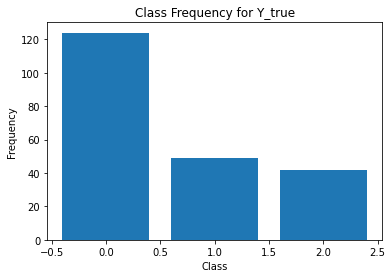

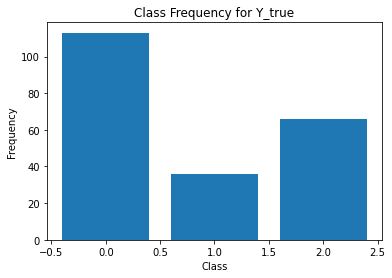

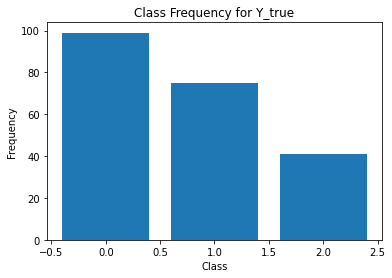

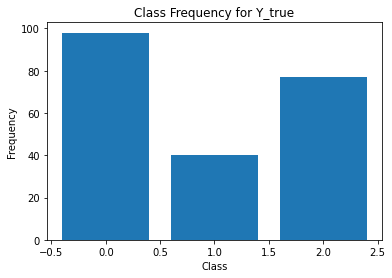

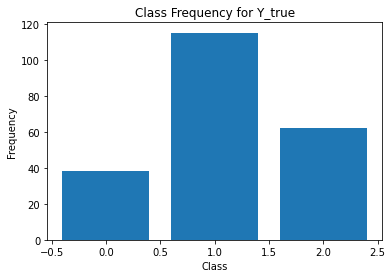

In [22]:
from sklearn.metrics import classification_report
for i in range(Y.shape[1]):
    print('annotator',i+1)
    print(classification_report(t,Y[:,i]))
    unique, counts = np.unique(Y[:,i], return_counts=True)
    plt.figure()
    plt.bar(unique, counts)
#     unique, counts = np.unique(Y_test[5], return_counts=True)
#     plt.bar(unique, counts)

    plt.title('Class Frequency for Y_true')
    plt.xlabel('Class')
    plt.ylabel('Frequency')


# Split data

In [23]:
import numpy.matlib
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
Ns = 1
ss = ShuffleSplit(n_splits=Ns, test_size=0.3,random_state =123)
for train_index, test_index in ss.split(X):
    print(test_index)
    X_train, X_test,Y_train,Y_test = X[train_index,:], X[test_index,:],Y[train_index,:], Y[test_index,:]
    Y_true_train, Y_true_test = t[train_index].reshape(-1,1), t[test_index].reshape(-1,1)
print(X_train.shape, Y_train.shape, Y_true_train.shape)

[167 200  31 128  93 158 165 133 190 139 119  19 107 187  20 122 198 186
 193  52 204  71 166 178   4 201  79 197 116 161 172  21 127  53 179  72
 206 149  10  42  81  26  11 140  90 150 120  85 183 100  88 143 189  37
  50  62 108  77 181  24 175 169  33  23 194]
(150, 5) (150, 5) (150, 1)


# Apply MinMaxScaler

In [24]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Testing the Class 


iteration: 0


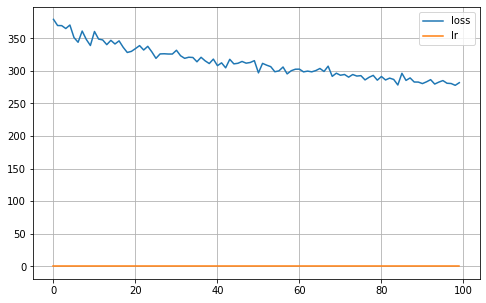

3/3 [==============================] - 0s 4ms/step
Validation ACC: 0.8923
Validation Balanced_ACC: 0.7276
Validation MI: 0.5841
Validation Normalized MI: 0.6841
Validation Adjusted MI: 0.6702
Validation aUc: 0.8600
Validation aUc_Sklearn: 0.9708
iteration: 1


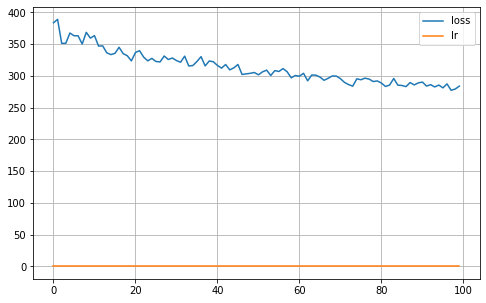

3/3 [==============================] - 0s 4ms/step
Validation ACC: 0.8923
Validation Balanced_ACC: 0.7276
Validation MI: 0.5841
Validation Normalized MI: 0.6841
Validation Adjusted MI: 0.6702
Validation aUc: 0.8600
Validation aUc_Sklearn: 0.9571
iteration: 2


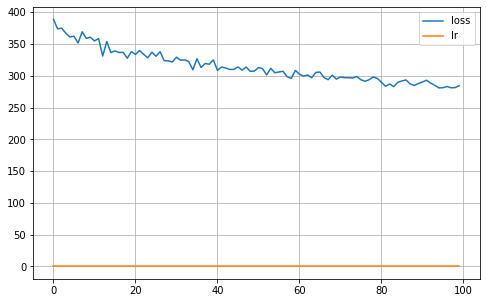

3/3 [==============================] - 0s 5ms/step
Validation ACC: 0.8923
Validation Balanced_ACC: 0.7276
Validation MI: 0.5841
Validation Normalized MI: 0.6841
Validation Adjusted MI: 0.6702
Validation aUc: 0.8600
Validation aUc_Sklearn: 0.9766
iteration: 3


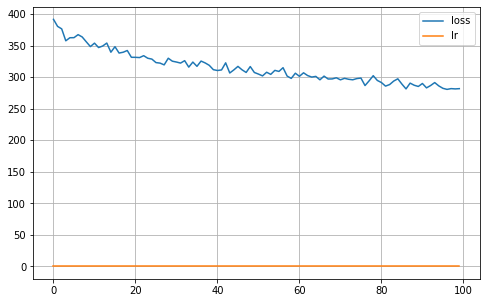

3/3 [==============================] - 0s 4ms/step
Validation ACC: 0.8923
Validation Balanced_ACC: 0.7276
Validation MI: 0.5841
Validation Normalized MI: 0.6841
Validation Adjusted MI: 0.6702
Validation aUc: 0.8600
Validation aUc_Sklearn: 0.9859
iteration: 4


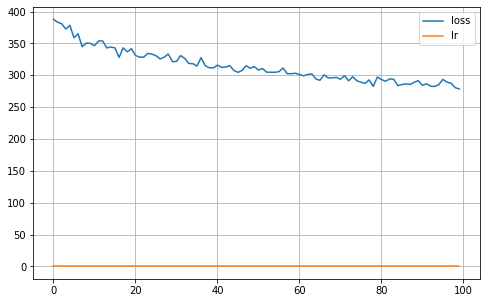

3/3 [==============================] - 0s 4ms/step
Validation ACC: 0.8923
Validation Balanced_ACC: 0.7276
Validation MI: 0.5841
Validation Normalized MI: 0.6841
Validation Adjusted MI: 0.6702
Validation aUc: 0.8600
Validation aUc_Sklearn: 0.9607
iteration: 5


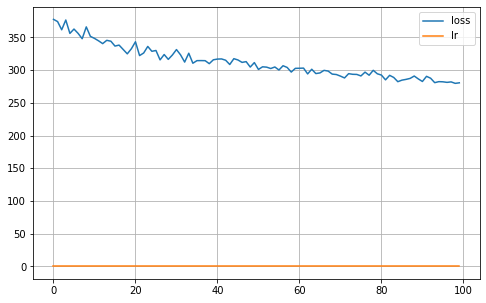

3/3 [==============================] - 0s 5ms/step
Validation ACC: 0.9077
Validation Balanced_ACC: 0.7660
Validation MI: 0.6169
Validation Normalized MI: 0.7109
Validation Adjusted MI: 0.6985
Validation aUc: 0.8800
Validation aUc_Sklearn: 0.9655
iteration: 6


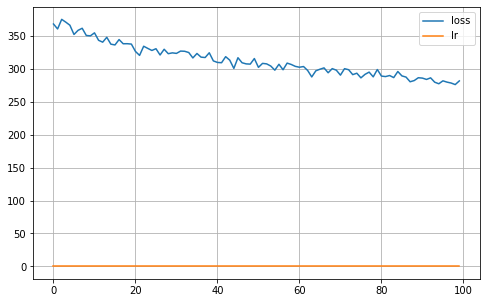

3/3 [==============================] - 0s 5ms/step
Validation ACC: 0.8923
Validation Balanced_ACC: 0.7276
Validation MI: 0.5841
Validation Normalized MI: 0.6841
Validation Adjusted MI: 0.6702
Validation aUc: 0.8600
Validation aUc_Sklearn: 0.9553
iteration: 7


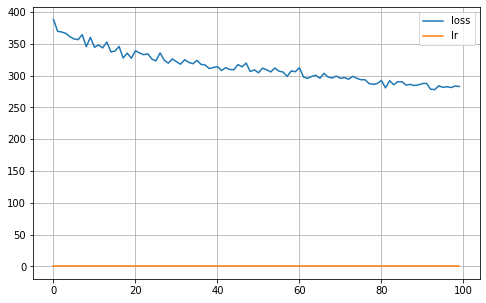

3/3 [==============================] - 0s 5ms/step
Validation ACC: 0.9231
Validation Balanced_ACC: 0.8045
Validation MI: 0.6526
Validation Normalized MI: 0.7409
Validation Adjusted MI: 0.7300
Validation aUc: 0.9000
Validation aUc_Sklearn: 0.9827
iteration: 8


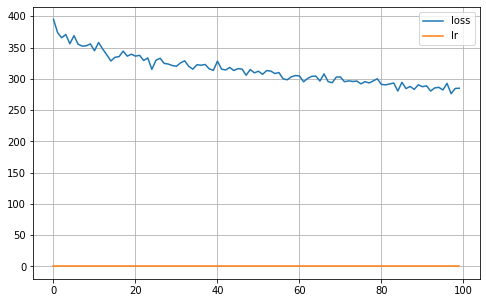

3/3 [==============================] - 0s 5ms/step
Validation ACC: 0.8923
Validation Balanced_ACC: 0.7276
Validation MI: 0.5841
Validation Normalized MI: 0.6841
Validation Adjusted MI: 0.6702
Validation aUc: 0.8600
Validation aUc_Sklearn: 0.9668
iteration: 9


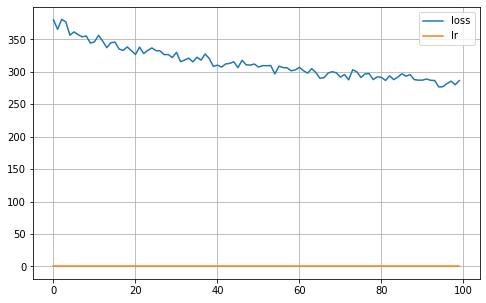

3/3 [==============================] - 0s 3ms/step
Validation ACC: 0.8923
Validation Balanced_ACC: 0.7276
Validation MI: 0.5841
Validation Normalized MI: 0.6841
Validation Adjusted MI: 0.6702
Validation aUc: 0.8600
Validation aUc_Sklearn: 0.9801


In [40]:
from sklearn.metrics import classification_report, balanced_accuracy_score, roc_auc_score
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score, adjusted_mutual_info_score
l1 =0.001
NUM_RUNS =10
ACC = np.zeros(NUM_RUNS)
AUC = np.zeros(NUM_RUNS)
AUCSK = np.zeros(NUM_RUNS)
MI = np.zeros(NUM_RUNS)
NMI = np.zeros(NUM_RUNS)
AMI = np.zeros(NUM_RUNS)
BACC = np.zeros(NUM_RUNS)
for i in range(NUM_RUNS): #10
    print("iteration: " + str(i))
   
    MA = Keras_MA_GCCE(epochs=100,batch_size=64,R=5, K=len(np.unique(Y_true_train)), dropout=0.2, learning_rate=0.001,optimizer='Adam', 
                l1_param=l1,  validation_split=0, verbose=0, q=0.01, neurons= 4)

    MA.fit(X_train, Y_train)
    MA.plot_history()
  
    #Accuracy
    pred_2 = MA.predict(X_test)
 
    report = classification_report( pred_2[:,Y.shape[1]:].argmax(axis=1),Y_true_test.ravel(),output_dict=True)
    ACC[i] = report['accuracy']
    print("Validation ACC: %.4f" % (float(ACC[i])))


    # balanced. Accurcy
    BACC[i] = balanced_accuracy_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze(), adjusted=True)
    print("Validation Balanced_ACC: %.4f" % (float(BACC[i])))

    #MI
    
    MI[i] = mutual_info_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze())
    print("Validation MI: %.4f" % (float(MI[i]),))
    NMI[i] = normalized_mutual_info_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze())
    print("Validation Normalized MI: %.4f" % (float(NMI[i]),))
    AMI[i]= adjusted_mutual_info_score(Y_true_test.squeeze(), pred_2[:,Y.shape[1]:].argmax(axis=1).squeeze())
    print("Validation Adjusted MI: %.4f" % (float(AMI[i]),))


    #AUC
    val_AUC_metric = tf.keras.metrics.AUC( from_logits = True)  
   # val_logits =MA.predict(X_test) # model(X_test, training=False)
    # tf.print(y_batch_val)
    val_AUC_metric.update_state(Y_true_test, pred_2[:,Y.shape[1]:].argmax(axis=1).astype('float'))

    val_AUC = val_AUC_metric.result()
    val_AUC_metric.reset_states()
    val_AUC = val_AUC.numpy()
    print("Validation aUc: %.4f" % (float(val_AUC),))
    AUC[i] = val_AUC
    val_AUC1 = roc_auc_score(ook(Y_true_test), pred_2[:,Y_train.shape[1]:])
    print("Validation aUc_Sklearn: %.4f" % (float(val_AUC1),))
    AUCSK[i] = val_AUC1


In [37]:

ACC

array([0.93846154, 0.93846154, 0.93846154, 0.93846154, 0.93846154,
       0.93846154, 0.93846154, 0.93846154, 0.93846154, 0.93846154])

In [38]:

AUC

array([0.91999996, 0.91999996, 0.91999996, 0.91999996, 0.91999996,
       0.91999996, 0.91999996, 0.91999996, 0.91999996, 0.91999996])

In [41]:
print('Average Accuracy: ', np.round( ACC.mean(),4)*100) 
print('Average std: ',np.round(np.std( ACC),4)*100)
print('==============================================')
print('Average AUC: ', np.round( AUC.mean(),4)*100) 
print('Average AUC std: ',np.round(np.std( AUC),4)*100)
print('==============================================')
print('Average AUC Sklearn: ', np.round( AUCSK.mean(),4)*100) 
print('Average AUC SK std: ',np.round(np.std( AUCSK),4)*100)
print('==============================================')
print('Average Balanced Accuracy: ', np.round( BACC.mean(),4)*100) 
print('Average std: ',np.round(np.std( BACC),4)*100)
print('==============================================')
print('Average MI: ', np.round( MI.mean(),4)*100) 
print('Average std: ',np.round(np.std(MI),4)*100)
print('==============================================')
print('Average Normalized MI: ', np.round( NMI.mean(),4)*100) 
print('Average std: ',np.round(np.std(NMI),4)*100)
print('==============================================')
print('Average Ajdusted MI: ', np.round( AMI.mean(),4)*100) 
print('Average std: ',np.round(np.std(AMI),4)*100)


Average Accuracy:  89.69
Average std:  0.9900000000000001
Average AUC:  86.6
Average AUC std:  1.28
Average AUC Sklearn:  97.02
Average AUC SK std:  1.03
Average Balanced Accuracy:  73.91
Average std:  2.46
Average MI:  59.419999999999995
Average std:  2.18
Average Normalized MI:  69.24
Average std:  1.7999999999999998
Average Ajdusted MI:  67.9
Average std:  1.9


In [42]:
import pickle

# create the dictionary with 6 scalar variables
Metrics = {
    'Accuracy': np.round( ACC.mean(),4)*100,
    'Accuracy_std': np.round(np.std( ACC),4)*100,
    'AUC': np.round( AUC.mean(),4)*100,
    'AUC_std': np.round(np.std( AUC),4)*100,
    'AUCSK': np.round( AUCSK.mean(),4)*100,
    'AUCSK_std': np.round(np.std( AUCSK),4)*100,
    'Balanced Accuracy': np.round( BACC.mean(),4)*100,
    'Balanced Accuracy_std':  np.round(np.std(BACC),4)*100,
    'MI': np.round( MI.mean(),4)*100,
    'MI_std': np.round(np.std(MI),4)*100,
    'Normalized MI': np.round( NMI.mean(),4)*100,
    'Normalized MI_std': np.round(np.std(NMI),4)*100,
    'Adjusted MI': np.round( AMI.mean(),4)*100,
    'Adjusted MI_std': np.round(np.std(NMI),4)*100,
}

# save the dictionary to a file using pickle
with open('data.pickle', 'wb') as handle:
    pickle.dump(Metrics, handle, protocol=pickle.HIGHEST_PROTOCOL)
Metrics

{'Accuracy': 89.69,
 'Accuracy_std': 0.9900000000000001,
 'AUC': 86.6,
 'AUC_std': 1.28,
 'AUCSK': 97.02,
 'AUCSK_std': 1.03,
 'Balanced Accuracy': 73.91,
 'Balanced Accuracy_std': 2.46,
 'MI': 59.419999999999995,
 'MI_std': 2.18,
 'Normalized MI': 69.24,
 'Normalized MI_std': 1.7999999999999998,
 'Adjusted MI': 67.9,
 'Adjusted MI_std': 1.7999999999999998}